<a href="https://colab.research.google.com/github/manojkumarshenu/CognoRise/blob/main/CUSTOMER_PERSONALITY_ANALYSIS(task3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/almabetter 1/cognoRise_datasets&task/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.shape

(2240, 29)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [6]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
df['Age'] = 2023 - df['Year_Birth']

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000


In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42


In [12]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [13]:
to_drop = ["ID", "Response"]
df = df.drop(to_drop, axis=1)


In [14]:
duplicates = df[df.duplicated(subset=df.columns, keep=False)]
duplicates_sorted = duplicates.sort_values(by='Income')
duplicates_sorted

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age
30,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,...,5,0,0,0,0,0,0,3,11,34
1138,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,...,5,0,0,0,0,0,0,3,11,34
1203,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,...,7,1,0,0,0,0,0,3,11,44
260,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,...,7,1,0,0,0,0,0,3,11,44
1107,1970,2n Cycle,Married,15315.0,0,0,2013-08-03,27,7,4,...,5,0,0,0,0,0,0,3,11,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,...,1,0,0,1,0,0,0,3,11,32
1301,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,...,2,0,1,1,1,0,0,3,11,70
943,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,...,2,0,1,1,1,0,0,3,11,70
1113,1960,Master,Single,98777.0,0,0,2014-02-17,23,1000,19,...,1,0,1,0,0,0,0,3,11,63


In [15]:
df=df.drop_duplicates()
duplicates = df[df.duplicated(subset=df.columns, keep=False)]
# Adjust font size for the print statement
from IPython.display import display, HTML
display(HTML(f'<p style="font-size:16px;">The dataframe now does not contain duplicates</p>'))

In [16]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,66
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,69
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,58
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,39
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,42


In [17]:
df = df.rename(columns={"Recency":"Last_Purchase",
                                  "MntWines": "Wines",
                                  "MntFruits":"Fruits",
                                  "MntMeatProducts":"Meat",
                                  "MntFishProducts":"Fish",
                                  "MntSweetProducts":"Sweets",
                                  "MntGoldProds":"Gold",
                                  "NumDealsPurchases": "Deals_Purchases",
                                  "NumWebPurchases": "Web_Purchases",
                                  "NumCatalogPurchases": "Catalog_Purchases",
                                  "NumStorePurchases": "Store_Purchases",
                                  "NumWebVisitsMonth": "Web_Visits" })

**Total Spendings**

In [18]:
df['Tpt_Spendings'] = df['Wines']+df['Fruits']+df['Meat']+df['Fish']+df['Sweets']+df['Gold']

**Total Purchase**

In [19]:
df['Total_Purchases'] = df['Web_Purchases'] + df['Store_Purchases'] + df['Catalog_Purchases']


**Customer**

In [20]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Last_Purchase,Wines,Fruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Tpt_Spendings,Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,3,11,66,1617,22
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,3,11,69,27,4
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,3,11,58,776,20
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,3,11,39,53,6
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,3,11,42,422,14


In [21]:
dates = [ ]
for i in df['Dt_Customer']:
  i = i.date()
  dates.append(i)


#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [22]:
# Find the last recorded date in the dataset
last_recorded_date = df['Dt_Customer'].max()

# Calculate the difference in days and create the 'Customer_For' feature
df['Customer_For'] = (last_recorded_date - df['Dt_Customer']).dt.days

# Display the DataFrame to verify the new feature
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Last_Purchase,Wines,Fruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Tpt_Spendings,Total_Purchases,Customer_For
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,66,1617,22,663
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,69,27,4,113
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,58,776,20,312
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,39,53,6,139
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,42,422,14,161


In [23]:
df["Age"] = 2014-df["Year_Birth"]
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Last_Purchase,Wines,Fruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Tpt_Spendings,Total_Purchases,Customer_For
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,57,1617,22,663
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,60,27,4,113
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,49,776,20,312
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,30,53,6,139
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,33,422,14,161


In [24]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")


Total categories in the feature Marital_Status:
 Marital_Status
Married     788
Together    517
Single      445
Divorced    213
Widow        70
Alone         3
Absurd        2
YOLO          1
Name: count, dtype: int64 



In [25]:
filtered_records = df[df['Marital_Status'].isin(['Absurd', 'YOLO'])]
filtered_records

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Last_Purchase,Wines,Fruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Tpt_Spendings,Total_Purchases,Customer_For
2093,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,...,1,1,0,0,3,11,21,1216,21,557
2134,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,...,0,0,0,0,3,11,57,1169,14,170
2177,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,...,0,0,0,0,3,11,41,424,14,619


In [26]:
df = df[~df['Marital_Status'].isin(['YOLO', 'Absurd'])]


In [27]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Widow":"Alone", "Divorced":"Alone", "Single":"Alone",})


In [28]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Marital_Status
Partner    1305
Alone       731
Name: count, dtype: int64 



In [29]:
df["Children"]=df["Kidhome"]+df["Teenhome"]


In [30]:
df["Family_Size"] = df["Marital_Status"].replace({"Alone": 1, "Partner": 2}).astype(int) + df["Children"]

In [31]:
def family_status(row):
    if row['Marital_Status'] == 'Alone':
        if row['Children'] >= 1:
            return 'Single Parent'
        else:
            return 'Single'
    elif row['Marital_Status'] == 'Partner':
        if row['Children'] >= 1:
            return 'Normal Parent'
        else:
            return 'Childless Couple'

# Apply the function to each row in the DataFrame
df['Family_Status'] = df.apply(family_status, axis=1)


In [32]:
df["Is_Parent"] = np.where(df.Children> 0, "Yes", "No")


In [33]:
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Education:
 Education
Graduation    1024
PhD            441
Master         336
2n Cycle       186
Basic           49
Name: count, dtype: int64


In [34]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate",
                                                   "Graduation":"Graduate",
                                                   "2n Cycle":"Postgraduate",
                                                   "Master":"Postgraduate",
                                                   "PhD":"Postgraduate"})

In [35]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Tpt_Spendings,Total_Purchases,Customer_For,Children,Family_Size
count,2036.000000,2036.000000,2036.000000,2036.000000,2036,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,...,2036.000000,2036.000000,2036.0,2036.0,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,1968.759823,52342.944024,0.445481,0.507859,2013-07-12 07:03:39.253438208,49.115422,303.271611,26.305501,167.670923,37.307957,...,0.012770,0.009823,3.0,11.0,45.240177,605.384086,12.524067,351.705796,0.953340,2.594303
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,18.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,1959.000000,35697.750000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,23.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,3.0,11.0,37.000000,68.000000,6.000000,178.750000,0.000000,2.000000
50%,1970.000000,52054.000000,0.000000,0.000000,2013-07-13 00:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,3.0,11.0,44.000000,395.500000,12.000000,351.000000,1.000000,3.000000
75%,1977.000000,68289.750000,1.000000,1.000000,2014-01-01 06:00:00,74.000000,504.000000,33.000000,230.000000,50.000000,...,0.000000,0.000000,3.0,11.0,55.000000,1043.250000,18.000000,526.000000,1.000000,3.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,3.0,11.0,121.000000,2525.000000,32.000000,699.000000,3.000000,5.000000
std,11.976668,25439.548971,0.537968,0.546993,NaN,28.977157,336.046961,39.804485,227.962510,54.485496,...,0.112309,0.098648,0.0,0.0,11.976668,602.240779,7.191102,201.901682,0.748649,0.905591


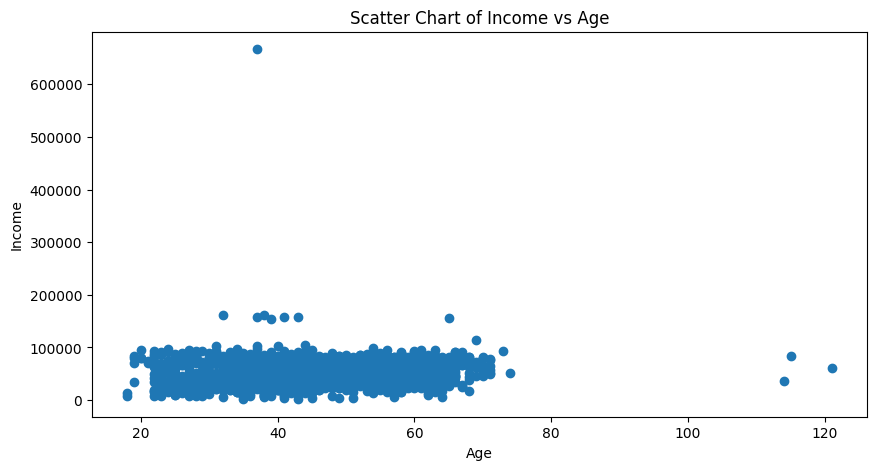

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['Income'])

# Set the title and labels
plt.title('Scatter Chart of Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')

# Show the plot
plt.show()


In [37]:
df = df[(df["Age"]<80)]
df = df[(df["Income"]<140000)]
df = df[(df["Meat"]<1500)]
df = df[(df["Web_Purchases"]<20)]
# df = df[(df["Catalog_Purchases"]<15)]

df = df[(df["Web_Visits"]<13)]
df = df[(df["Deals_Purchases"]<7)]

print("The total number of data-points after removing the outliers are:", len(df))


The total number of data-points after removing the outliers are: 1939


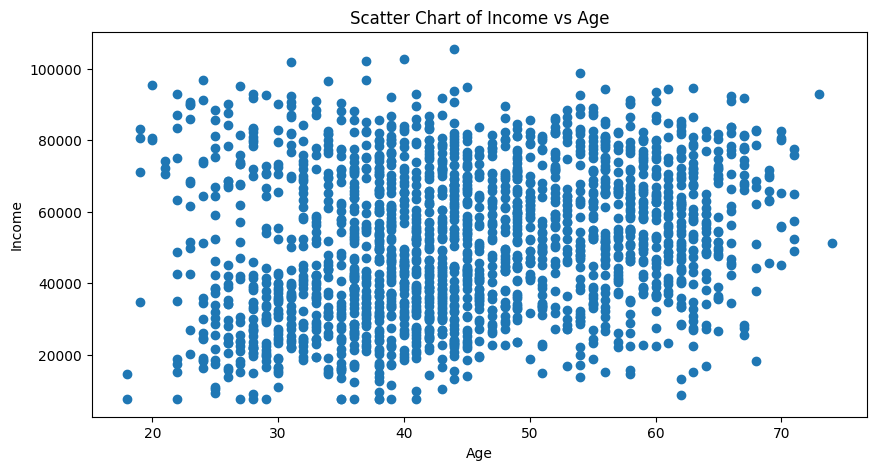

In [38]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['Income'])

# Set the title and labels
plt.title('Scatter Chart of Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')

# Show the plot
plt.show()

In [39]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Last_Purchase', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'Deals_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'Web_Visits', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Age', 'Tpt_Spendings',
       'Total_Purchases', 'Customer_For', 'Children', 'Family_Size',
       'Family_Status', 'Is_Parent'],
      dtype='object')


Descriptive Statistics:
        Year_Birth         Income      Kidhome     Teenhome  \
count  1939.000000    1939.000000  1939.000000  1939.000000   
mean   1968.911294   51801.793722     0.431150     0.491490   
min    1940.000000    7500.000000     0.000000     0.000000   
25%    1959.000000   35331.000000     0.000000     0.000000   
50%    1970.000000   51537.000000     0.000000     0.000000   
75%    1978.000000   68688.500000     1.000000     1.000000   
max    1996.000000  105471.000000     2.000000     2.000000   
std      11.744062   20583.633898     0.534447     0.542616   

                         Dt_Customer  Last_Purchase        Wines       Fruits  \
count                           1939    1939.000000  1939.000000  1939.000000   
mean   2013-07-16 00:38:37.070654976      49.180505   301.883445    26.775142   
min              2012-07-30 00:00:00       0.000000     0.000000     0.000000   
25%              2013-01-21 12:00:00      24.000000    23.000000     2.000000   
50

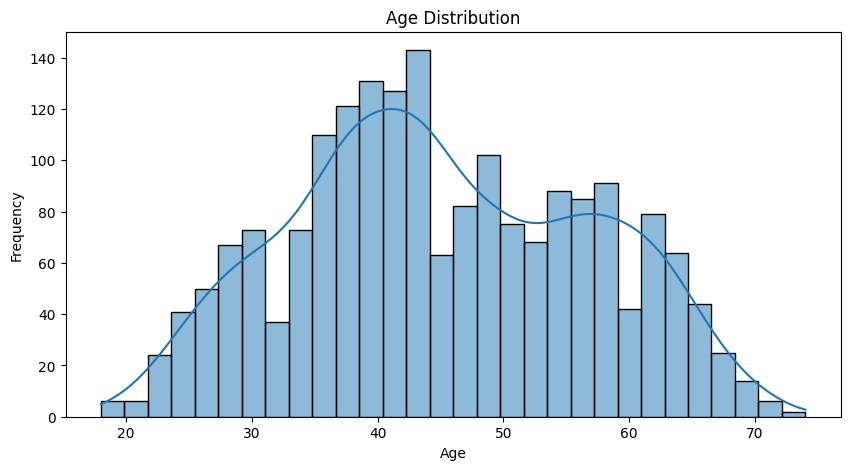

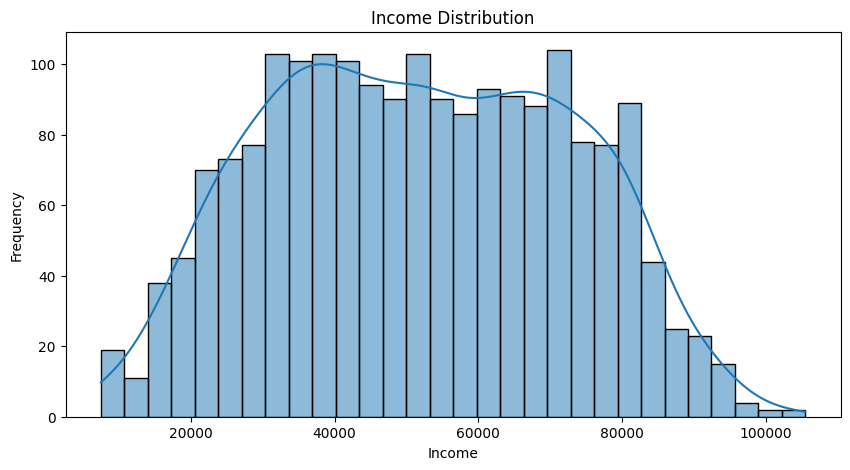

In [40]:

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Univariate analysis: Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Univariate analysis: Income distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()



Text(0, 0.5, 'Average Income')

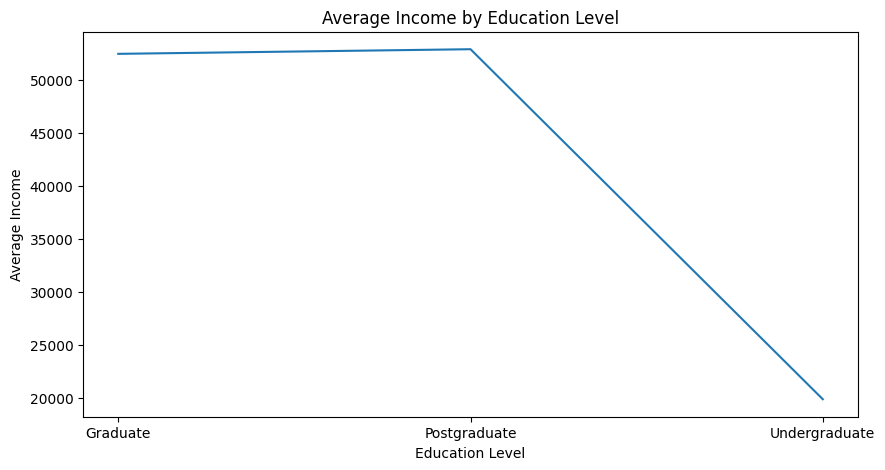

In [44]:
# Education of Customers vs their income
edu_income = df.groupby("Education")["Income"].agg("mean")
edu_income
plt.figure(figsize=(10, 5))
sns.lineplot(x=edu_income.index, y=edu_income.values)
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')

Text(0, 0.5, 'Average Recency')

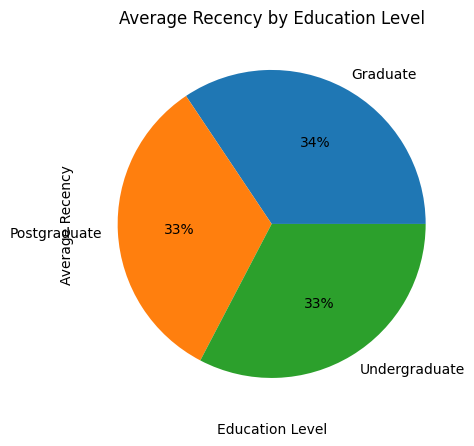

In [51]:
rec_edu =  df.groupby("Education")['Last_Purchase'].agg('mean')
plt.figure(figsize=(15, 5))
plt.pie(rec_edu, labels=rec_edu.index,autopct="%.0f%%")
plt.title('Average Recency by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Recency')

Text(0, 0.5, 'Average Income')

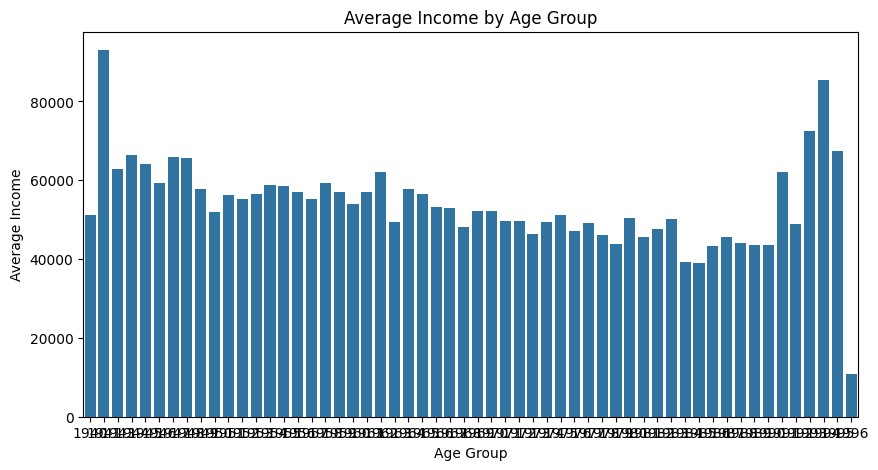

In [42]:
# Income acc. to age of customers associated with the company
age_group = df.groupby("Year_Birth")["Income"].mean()
age_group
plt.figure(figsize=(10, 5))
sns.barplot(x=age_group.index, y=age_group.values)
plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')